# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
query_url = f"{url}appid={weather_api_key}&units={unit}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | necochea
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | luanda
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | zaozerne
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | voyvozh
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | nome
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | debre tabor
Processing Record 22 of Set 1 | karpogory
Processing Record 2

Processing Record 33 of Set 4 | macusani
Processing Record 34 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 35 of Set 4 | lac du bonnet
Processing Record 36 of Set 4 | atar
Processing Record 37 of Set 4 | bonfim
Processing Record 38 of Set 4 | sao gabriel
Processing Record 39 of Set 4 | port blair
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | yirol
City not found. Skipping...
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | kalmunai
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | qasigiannguit
Processing Record 46 of Set 4 | sainte-marie
Processing Record 47 of Set 4 | bandarbeyla
Processing Record 48 of Set 4 | wajir
Processing Record 49 of Set 4 | haines junction
Processing Record 0 of Set 5 | lasa
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | poya
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set

Processing Record 23 of Set 8 | tupiza
Processing Record 24 of Set 8 | krasnogorsk
Processing Record 25 of Set 8 | kidal
Processing Record 26 of Set 8 | seymchan
Processing Record 27 of Set 8 | wanning
Processing Record 28 of Set 8 | natal
Processing Record 29 of Set 8 | abaza
Processing Record 30 of Set 8 | bollnas
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | ajdabiya
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | bangolo
Processing Record 35 of Set 8 | belmonte
Processing Record 36 of Set 8 | sampit
Processing Record 37 of Set 8 | bafoulabe
Processing Record 38 of Set 8 | progreso
Processing Record 39 of Set 8 | svetlyy
Processing Record 40 of Set 8 | balkhash
Processing Record 41 of Set 8 | ishikari
Processing Record 42 of Set 8 | jamame
Processing Record 43 of Set 8 | muroto
Processing Record 44 of Set 8 | leeton
Processing Record 45 of Set 8 | ambon
Processing Record 46 of Set 8 | frankenberg
Processing Record 47 of Set 8 | n

Processing Record 16 of Set 12 | alice springs
Processing Record 17 of Set 12 | sola
Processing Record 18 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 19 of Set 12 | douglas
Processing Record 20 of Set 12 | kabare
Processing Record 21 of Set 12 | port hawkesbury
Processing Record 22 of Set 12 | vega de alatorre
Processing Record 23 of Set 12 | riyadh
Processing Record 24 of Set 12 | sao jose da coroa grande
Processing Record 25 of Set 12 | san martin
Processing Record 26 of Set 12 | zhigansk
Processing Record 27 of Set 12 | waw
Processing Record 28 of Set 12 | nong chik
Processing Record 29 of Set 12 | hobyo
Processing Record 30 of Set 12 | lolua
City not found. Skipping...
Processing Record 31 of Set 12 | kovdor
Processing Record 32 of Set 12 | rawson
Processing Record 33 of Set 12 | beitbridge
Processing Record 34 of Set 12 | bernalillo
Processing Record 35 of Set 12 | mapiripan
Processing Record 36 of Set 12 | port hedland
Processing Record 37 of Set 12 | cab

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,12.29,92,37,2.53,NZ,1674371281
1,port alfred,-33.5906,26.8910,23.43,92,100,2.24,ZA,1674371165
2,puerto ayora,-0.7393,-90.3518,23.08,97,48,1.83,EC,1674371098
3,cidreira,-30.1811,-50.2056,22.39,88,100,2.55,BR,1674371002
4,bredasdorp,-34.5322,20.0403,20.05,79,100,2.25,ZA,1674371284
...,...,...,...,...,...,...,...,...,...
564,pathein,16.7833,94.7333,32.99,19,99,1.67,MM,1674371608
565,champerico,14.3000,-91.9167,24.27,78,4,3.80,GT,1674371608
566,meulaboh,4.1363,96.1285,28.55,65,74,2.30,ID,1674371609
567,palmer,42.1584,-72.3287,-0.28,73,100,2.06,US,1674371486


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,12.29,92,37,2.53,NZ,1674371281
1,port alfred,-33.5906,26.8910,23.43,92,100,2.24,ZA,1674371165
2,puerto ayora,-0.7393,-90.3518,23.08,97,48,1.83,EC,1674371098
3,cidreira,-30.1811,-50.2056,22.39,88,100,2.55,BR,1674371002
4,bredasdorp,-34.5322,20.0403,20.05,79,100,2.25,ZA,1674371284


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,12.29,92,37,2.53,NZ,1674371281
1,port alfred,-33.5906,26.8910,23.43,92,100,2.24,ZA,1674371165
2,puerto ayora,-0.7393,-90.3518,23.08,97,48,1.83,EC,1674371098
3,cidreira,-30.1811,-50.2056,22.39,88,100,2.55,BR,1674371002
4,bredasdorp,-34.5322,20.0403,20.05,79,100,2.25,ZA,1674371284


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

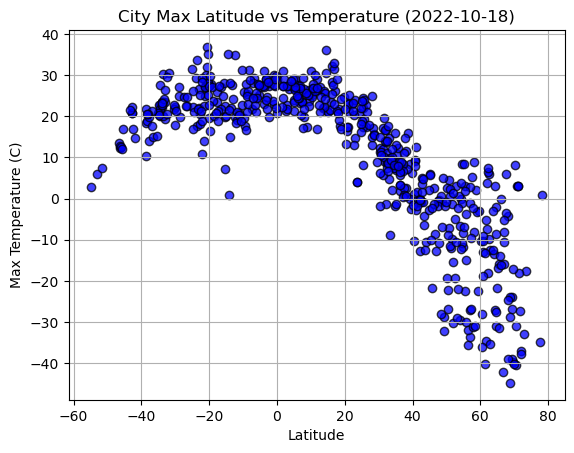

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)
                                            
# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

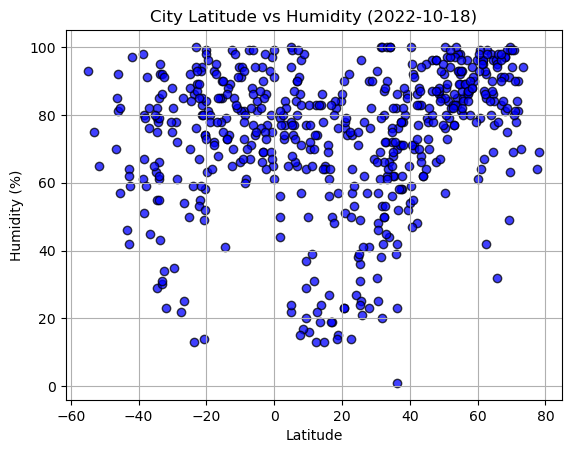

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

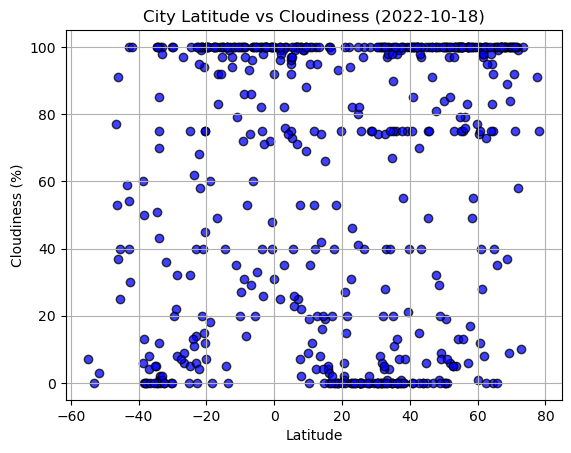

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

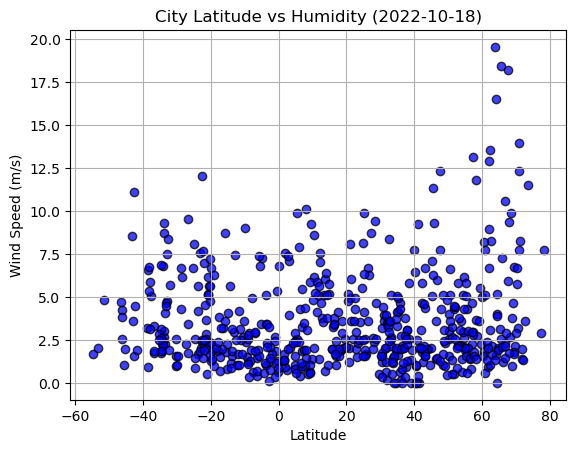

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Latitude_vs_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,ribeira grande,38.5167,-28.7000,15.99,80,7,5.81,PT,1674371285
6,upernavik,72.7868,-56.1549,-32.80,70,10,3.58,GL,1674371285
7,nanortalik,60.1432,-45.2371,-10.26,61,1,4.98,GL,1674371133
11,kavaratti,10.5669,72.6420,26.86,70,35,6.14,IN,1674371288
14,zaozerne,45.1582,33.2787,5.88,79,0,7.07,UA,1674371084


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,12.29,92,37,2.53,NZ,1674371281
1,port alfred,-33.5906,26.8910,23.43,92,100,2.24,ZA,1674371165
2,puerto ayora,-0.7393,-90.3518,23.08,97,48,1.83,EC,1674371098
3,cidreira,-30.1811,-50.2056,22.39,88,100,2.55,BR,1674371002
4,bredasdorp,-34.5322,20.0403,20.05,79,100,2.25,ZA,1674371284


###  Temperature vs. Latitude Linear Regression Plot

The correlation between both factors is: -0.86


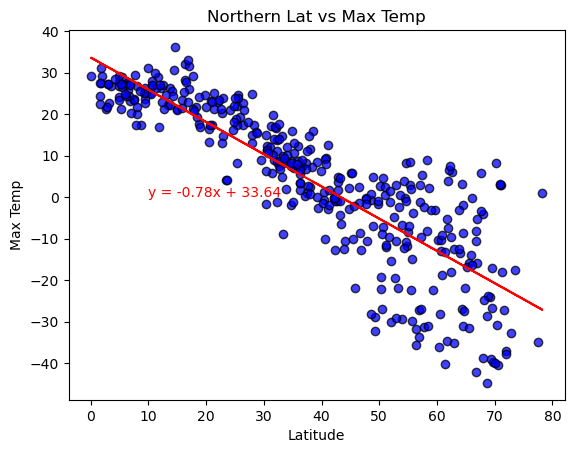

In [30]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
print(f"The correlation between both factors is: {round(correlation[0],2)}") 

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.title("Northern Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,0),color='red')

plt.savefig("output_data/NLatitude_vs_Temp_Regression.png")



The correlation between both factors is: 0.46


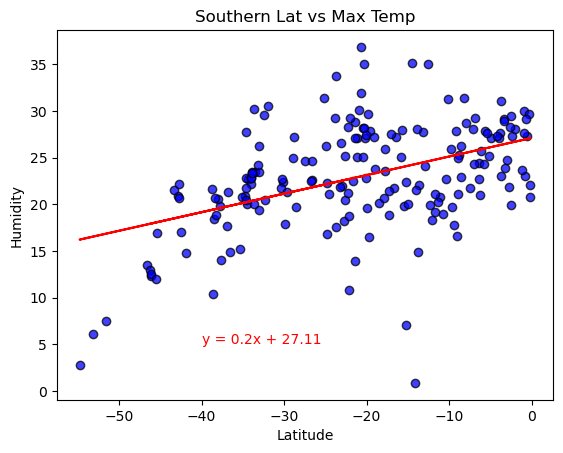

In [34]:
# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
print(f"The correlation between both factors is: {round(correlation[0],2)}") 

plt.title("Southern Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,5),color='red')
                           
plt.savefig("output_data/SLatitude_vs_Temp_Regression.png")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [35]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The correlation between both factors is: {round(correlation[0],2)}") 

plt.title("Northern Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(northern_hemi_def["Lat",regress_values,"r-")
plt.annotate(line_eq,(50,20),color='red')
                           
plt.savefig("output_data/NLatitude_vs_Humidity_Regression.png")



SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2756979093.py, line 14)

The correlation between both factors is: 0.25


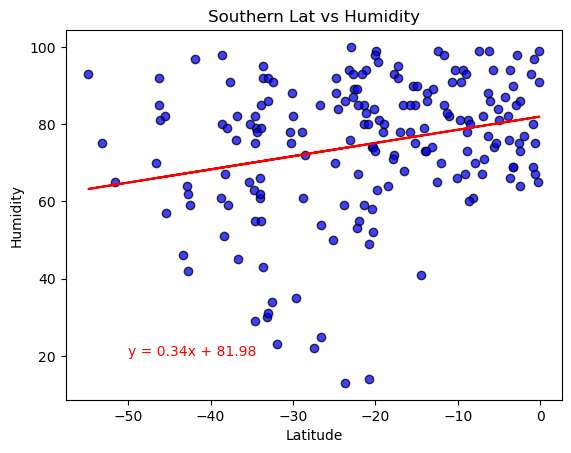

In [38]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(f"The correlation between both factors is: {round(correlation[0],2)}") 

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.title("Southern Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,20),color='red')
                           
plt.savefig("output_data/SLatitude_vs_Temp_Regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between both factors is: 0.43


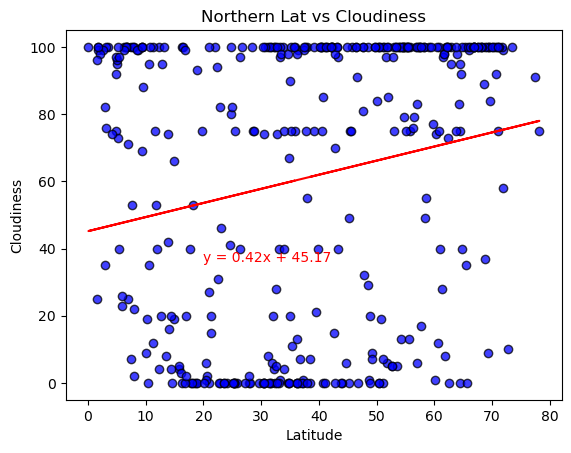

In [39]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The correlation between both factors is: {round(correlation[0],2)}") 

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.title("Northern Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,36),color='red')
                           
plt.savefig("output_data/NLatitude_vs_Cloudiness_Regression.png")



The correlation between both factors is: 0.25


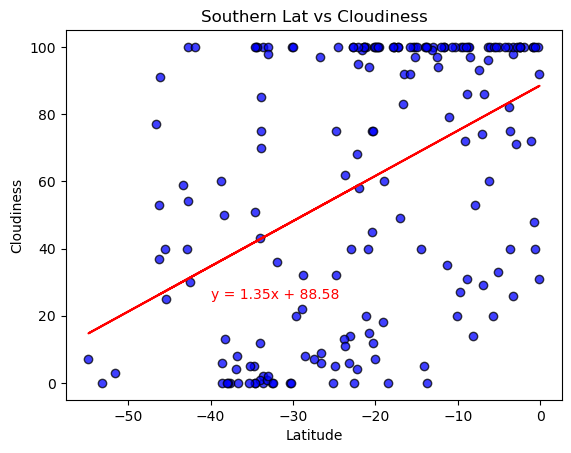

In [41]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(f"The correlation between both factors is: {round(correlation[0],2)}") 


plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.title("Southern Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-40,25),color='red')
                           
plt.savefig("output_data/SLatitude_vs_Cloudiness_Regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between both factors is: 0.43


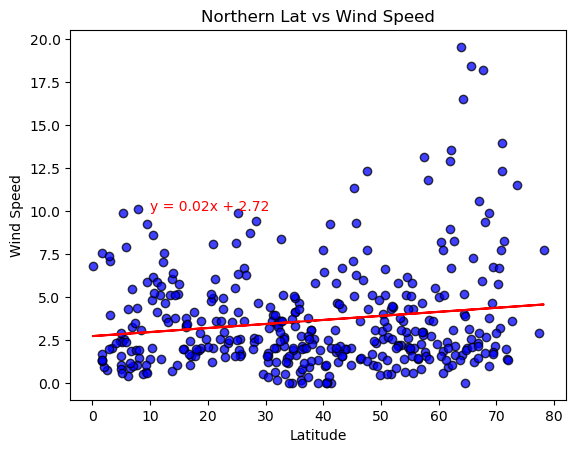

In [43]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The correlation between both factors is: {round(correlation[0],2)}") 

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.title("Northern Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,10),color='red')
                           
plt.savefig("output_data/NLatitude_vs_WindSpeed_Regression.png")


The correlation between both factors is: 0.43


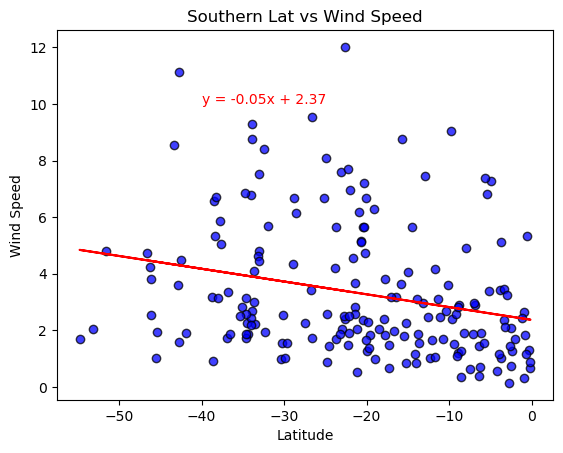

In [44]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The correlation between both factors is: {round(correlation[0],2)}") 

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.title("Southern Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-40,10),color='red')
                           
plt.savefig("output_data/SLatitude_vs_WindSpeed_Regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE